In [98]:
import time
import numpy as np
# I ASSUME THAT ALL INPUTS ARE VALID, SHOULD I NOT?

class Game:

    def __init__(self): 
        # state of the whole game at each step
        self.state = None
        # maximum number k of objects that can be removed from a single heap
        self.max_removal = None
        # flags if alpha-beta pruning should be applied
        self.is_pruned = True
        # tracker of states visited every time minimax is called
        self.states_visited = 1


    def play(self, m, n, k, is_pruned=True, automatic=True):
        """ Runs a game of Nim.
        """

        # update attributes
        self.state = self.initialize_game(n, m)
        self.max_removal = k
        self.is_pruned = is_pruned

        # if the computer wins, winner = 0, otherwise winner = 1
        winner = 0

        print("-"*80)
        print("\nThis is the initial state of the heaps: \n")

        # show initial state of the game
        self.drawheaps()

        # execute the game to find a winner
        if automatic:
            winner, times, states_visited_log = self.execute_automatic_game()
        else:
            winner, times, states_visited_log = self.execute_game()

        # show the game results
        print("\nEnd of game!")
        if winner == 1:
            print("Well done! you won!")
        else:
            print("Sorry! You lost!")
        
        return times, states_visited_log


    def execute_game(self):
        """Executes Nim alternating turns between the user and the computer 
        until there is a winner
        
        Returns:
            int: number identifying the winner of the game. 1 if it is the user
                and 0 if it is the computer
            list (floats): list containing the time taken to evaluate the 
                            decision tree at every move
        """
        # list used to record the time taken to evaluate the game tree at every move
        times = []
        states_visited_log = []
        already_recommended = False
        while not self.is_terminal(self.state):
            # if already_recommended == True then recommendation has already been made
            # and thus the action should not be computed again for computational efficiency purposes
            if not already_recommended:
                start_time = time.time()
                action = self.max_decision(self.state)
                end_time = time.time()
                times.append(end_time - start_time)
                states_visited_log.append(self.states_visited)
                self.states_visited = 1


            print(f"I would recommend removing {action[1]} objects from heap {action[0]}\n")

            # user should enter the number of the heap they want to remove objects from
            heap_num = int(input("Please enter the heap number you want to remove objects from: \n"))

            # user should enter the number of objects they want to remove
            objects_num = int(input("Please enter how many objects you want to remove: \n"))

            # validity check, if passes, then we continue the steps within the for loop,
            # otherwise we go to the start of the for loop
            if not self.is_valid(heap_num, objects_num):
                already_recommended = True
                continue

            already_recommended = False

            # update the state of the game accordingly
            self.update_state((heap_num, objects_num))
            print("\nThe heaps currently look like this: \n")

            # show the state of the game after the user's action
            self.drawheaps()

            winner = 0

            # if game has not finished continue to computer's move
            if not self.is_terminal(self.state):
                start_time = time.time()
                computer_action = self.min_decision(self.state)
                end_time = time.time()
                times.append(end_time - start_time)
                states_visited_log.append(self.states_visited)
                self.states_visited = 1

                print(f"Computer removes {computer_action[1]} from heap {computer_action[0]}\n")
                self.update_state(computer_action)
                print("The heaps currently look like this: \n")
                self.drawheaps()
                winner = 1
        
        return winner, times, states_visited_log


    def execute_automatic_game(self):
        """Executes Nim alternating turns between two computer players 
        until there is a winner
        
        Returns:
            int: number identifying the winner of the game. 1 if it is the user
                and 0 if it is the computer
            list (floats): list containing the time taken to evaluate the 
                            decision tree at every move
        """
        # list used to record the time taken to evaluate the game tree at every move
        times = []
        states_visited_log = []

        while not self.is_terminal(self.state):

            start_time = time.time()
            computer_action = self.max_decision(self.state)
            end_time = time.time()
            times.append(end_time - start_time)
            states_visited_log.append(self.states_visited)
            self.states_visited = 1

            print(f"Computer removes {computer_action[1]} from heap {computer_action[0]}\n")
            self.update_state(computer_action)
            print("\nThe heaps currently look like this: \n")

            # show the state of the game after the user's action
            self.drawheaps()

            winner = 0

            # if game has not finished continue to computer's move
            if not self.is_terminal(self.state):
                start_time = time.time()
                computer_action = self.min_decision(self.state)
                end_time = time.time()
                times.append(end_time - start_time)
                states_visited_log.append(self.states_visited)
                self.states_visited = 1

                print(f"Computer removes {computer_action[1]} from heap {computer_action[0]}\n")
                self.update_state(computer_action)
                print("The heaps currently look like this: \n")
                self.drawheaps()
                winner = 1
        
        return winner, times, states_visited_log

    def initialize_game(self, n, m):
        """ Forms the intial state structure of the game.

            Args:
                n (int) : number of heaps
                m (int) : number of objects in each heap
            
            Returns:
                list : the initial game state in the form of a list
        """
        return [m] * n


    def update_state(self, action):
        """ Updates the state of the game give the action taken.

            Args:
                action (tuple) : action taken, first element being the number of the heap, and second element being 
                                 the number of objects to be removed from that heap

            Returns:
                None
        """
        self.state[action[0]] -= action[1]


    def is_valid(self, heap_num, objects_num):
        """ Checks if the user's input are valid.

            Args: 
                heap_num (int) : number of a heap
                objects_num (int) : number of objects
            
            Returns:
                bool : True if valid, otherwise False
        """
        max_heap_num = len(self.state) - 1

        # check if heap numebr is within correct sizes
        if heap_num < 0 or heap_num > max_heap_num:
            print("Invalid heap number! Please try again!\n")
            return False
        
        objects_left = self.state[heap_num] 

        # check if the number of objects is at least 0 and at most the maximum
        # allowance or the number of objects left in the heap
        if objects_num < 0 or objects_num > objects_left or objects_num > self.max_removal:
            print("Invalid number of objects! Please try again!")
            return False
        return True
    

    def drawheaps(self):
        """ Outputs the heaps on the screen.
        """
        heaps = self.state

        for idx, heap in enumerate(heaps):
            print(f"Heap {idx}:", end=" ")
            for num in range(heap):
                print("o", end=" ")
            print()
        print()
        print("-"*80)


    def max_decision(self, state):
        """ Returns the Minimax decision of the Max (user) player.

            Args:
                state (list) : current state of the game
            
            Returns:
                tuple : first element of tuple indicates optimal number of heap, and second
                        number indicates number of objects to be removed from that heap
        """
        alpha = -float("inf")
        beta = float("inf")

        best_action = None
        max_value = -float("inf")
        for action in self.action(state):
            min_value = self.min_(self.result(state, action), 0, alpha, beta)
            if min_value > max_value:
                best_action = action
                max_value = min_value

        return best_action
    

    def min_(self, state, n, alpha, beta):
        """ Returns minimum utility value given a particular state. Uses alpha-beta pruning.

            Args:
                state (list) : the particular state being examined
                n (int) : if n is even then when it comes the user to play, there are not any objects left 
                             so the utility value for that terminal state is 1, whereas if n is odd, then 
                             user must have removed the last object and thus the utility value of that terminal
                             state is -1.
                alpha (float) : alpha is either -inf or -1 depending on the alpha-beta pruning algorithm
                beta (float) : beta is either inf or 1 depending on the alpha-beta pruning algorithm
            
            Returns:
                int : 1 if the minimum utility value from that state is 1,
                      -1 if the minimum utility value from that state is -1
        """
        n += 1
        if self.is_terminal(state):
            return self.utility(n)
        
        value = float("inf")
        for action in self.action(state):
            value = min(value, self.max_(self.result(state, action), n, alpha, beta))
            if self.is_pruned:
                if value <= alpha:
                    return value
                beta = min(beta, value)
        
        return value
    

    def min_decision(self, state):
        """ Returns the Minmax decision of the Min (computer) player.

            Args:
                state (list) : current state of the game
            
            Returns:
                tuple : first element of tuple indicates optimal number of heap, and second
                        number indicates number of objects to be removed from that heap
        """
        alpha = -float("inf")
        beta = float("inf")

        best_action = None
        min_value = float("inf")
        for action in self.action(state):
            max_value = self.max_(self.result(state, action), 1, alpha, beta)
            if max_value < min_value:
                best_action = action
                min_value = max_value

        return best_action
    

    def max_(self, state, n, alpha, beta):
        """ Returns maximum utility value given a particular state. Uses alpha-beta pruning.

            Args:
                state (list) : the particular state being examined
                n (int) : if n is even then when it comes the user to play, there are not any objects left 
                             so the utility value for that terminal state is 1, whereas if the n is odd, then 
                             user must have removed the last object and thus the utility value of that terminal
                             state is -1.
                alpha (float) : alpha is either -inf or -1 depending on the alpha-beta pruning algorithm
                beta (float) : beta is either inf or 1 depending on the alpha-beta pruning algorithm
            
            Returns:
                int : 1 if the maximum utility value from that state is 1,
                      -1 if the maximum utility value from that state is -1
        """
        n += 1
        if self.is_terminal(state):
            return self.utility(n)
        
        value = -float("inf")
        
        for action in self.action(state):
            value = max(value, self.min_(self.result(state, action), n, alpha, beta))
            if self.is_pruned:
                if value >= beta:
                    return value
                alpha = max(alpha, value)
        
        return value
    

    def action(self, state):
        """ Returns the action space given a particular state.

            Args:
                state (list) : the particular state being examined
            
            Returns:
                list[tuple] : list containing tuples, where each tuple represents a particular
                              action, first element of tuple being the number of heap, and second
                              element being the number of objects to be removed from that heap
        """
        action_space = []
        for idx, object_num in enumerate(state):
            if object_num == 0:
                pass
            elif object_num < self.max_removal:
                for i in range(1, object_num+1):
                    action_space.append((idx, i))
            else:
                for i in range(1, self.max_removal+1):
                    action_space.append((idx, i))

        return action_space
    

    def is_terminal(self, state):
        """ Checks if the particular state is a terminal state.

            Args:
                state (list) : the particular state being examined
            
            Returns:
                bool : True if the state is terminal, False otherwise
        """
        return sum(state) == 0
    

    def result(self, state, action):
        """ Gives the next state given a current state and action taken.

            Args:
                state (list) : current state
                action (tuple) : action taken
            
            Returns :
                list : next state
        """
        # copy to prevent mutation
        state = state.copy()
        state[action[0]] -= action[1]

        # update number of states visited
        self.states_visited += 1
        
        return state
    

    def utility(self, n):
        """Returns the utility of the leaf node
        
        Args:
            n (int) : if n is even then when it comes the user to play, there are not any objects left 
                    so the utility value for that terminal state is 1, whereas if the n is odd, then 
                    user must have removed the last object and thus the utility value of that terminal
                    state is -1.
        
        Returns:
            int: 1 if the utility of the terminal state is 1,
                 -1 if the utility of the terminal state is -1
        """
        if n % 2 == 0:
            return 1
        else:
            return -1


test = Game()
"""
times, states_visited = test.play(m, n, k, is_pruned=False, automatic=True)
print(f"Times: {times[0]}")
print(f"States visited: {states_visited[0]}")
"""
max_m = 4
max_n = 3
max_k = 3
record1 = np.zeros((2, max_k, max_n, max_m))
record2 = np.zeros((2, max_k, max_n, max_m))
record3 = np.zeros((2, max_k, max_n, max_m))
record4 = np.zeros((2, max_k, max_n, max_m))
record5 = np.zeros((2, max_k, max_n, max_m))
record6 = np.zeros((2, max_k, max_n, max_m))
record7 = np.zeros((2, max_k, max_n, max_m))
record8 = np.zeros((2, max_k, max_n, max_m))
record9 = np.zeros((2, max_k, max_n, max_m))
record10 = np.zeros((2, max_k, max_n, max_m))

# Change this to modify the equations below more easily
prune = True

for k in range(1, max_k+1):
    for n in range(1, max_n+1):
        for m in range(1, max_m+1):
            print(f"At k: {k}, n: {n}, m: {m}")
            times, states_visited = test.play(m, n, k, is_pruned=prune, automatic=True)
            record1[0, k-1, n-1, m-1] = times[0]
            record1[1, k-1, n-1, m-1] = states_visited[0]

for k in range(1, max_k+1):
    for n in range(1, max_n+1):
        for m in range(1, max_m+1):
            print(f"At k: {k}, n: {n}, m: {m}")
            times, states_visited = test.play(m, n, k, is_pruned=prune, automatic=True)
            record2[0, k-1, n-1, m-1] = times[0]
            record2[1, k-1, n-1, m-1] = states_visited[0]  

for k in range(1, max_k+1):
    for n in range(1, max_n+1):
        for m in range(1, max_m+1):
            print(f"At k: {k}, n: {n}, m: {m}")
            times, states_visited = test.play(m, n, k, is_pruned=prune, automatic=True)
            record3[0, k-1, n-1, m-1] = times[0]
            record3[1, k-1, n-1, m-1] = states_visited[0]

for k in range(1, max_k+1):
    for n in range(1, max_n+1):
        for m in range(1, max_m+1):
            print(f"At k: {k}, n: {n}, m: {m}")
            times, states_visited = test.play(m, n, k, is_pruned=prune, automatic=True)
            record4[0, k-1, n-1, m-1] = times[0]
            record4[1, k-1, n-1, m-1] = states_visited[0]

for k in range(1, max_k+1):
    for n in range(1, max_n+1):
        for m in range(1, max_m+1):
            print(f"At k: {k}, n: {n}, m: {m}")
            times, states_visited = test.play(m, n, k, is_pruned=prune, automatic=True)
            record5[0, k-1, n-1, m-1] = times[0]
            record5[1, k-1, n-1, m-1] = states_visited[0]

for k in range(1, max_k+1):
    for n in range(1, max_n+1):
        for m in range(1, max_m+1):
            print(f"At k: {k}, n: {n}, m: {m}")
            times, states_visited = test.play(m, n, k, is_pruned=prune, automatic=True)
            record6[0, k-1, n-1, m-1] = times[0]
            record6[1, k-1, n-1, m-1] = states_visited[0] 

for k in range(1, max_k+1):
    for n in range(1, max_n+1):
        for m in range(1, max_m+1):
            print(f"At k: {k}, n: {n}, m: {m}")
            times, states_visited = test.play(m, n, k, is_pruned=prune, automatic=True)
            record7[0, k-1, n-1, m-1] = times[0]
            record7[1, k-1, n-1, m-1] = states_visited[0] 

for k in range(1, max_k+1):
    for n in range(1, max_n+1):
        for m in range(1, max_m+1):
            print(f"At k: {k}, n: {n}, m: {m}")
            times, states_visited = test.play(m, n, k, is_pruned=prune, automatic=True)
            record8[0, k-1, n-1, m-1] = times[0]
            record8[1, k-1, n-1, m-1] = states_visited[0] 

for k in range(1, max_k+1):
    for n in range(1, max_n+1):
        for m in range(1, max_m+1):
            print(f"At k: {k}, n: {n}, m: {m}")
            times, states_visited = test.play(m, n, k, is_pruned=prune, automatic=True)
            record9[0, k-1, n-1, m-1] = times[0]
            record9[1, k-1, n-1, m-1] = states_visited[0] 

for k in range(1, max_k+1):
    for n in range(1, max_n+1):
        for m in range(1, max_m+1):
            print(f"At k: {k}, n: {n}, m: {m}")
            times, states_visited = test.play(m, n, k, is_pruned=prune, automatic=True)
            record10[0, k-1, n-1, m-1] = times[0]
            record10[1, k-1, n-1, m-1] = states_visited[0] 

At k: 1, n: 1, m: 1
--------------------------------------------------------------------------------

This is the initial state of the heaps: 

Heap 0: o 

--------------------------------------------------------------------------------
Computer removes 1 from heap 0


The heaps currently look like this: 

Heap 0: 

--------------------------------------------------------------------------------

End of game!
Sorry! You lost!
At k: 1, n: 1, m: 2
--------------------------------------------------------------------------------

This is the initial state of the heaps: 

Heap 0: o o 

--------------------------------------------------------------------------------
Computer removes 1 from heap 0


The heaps currently look like this: 

Heap 0: o 

--------------------------------------------------------------------------------
Computer removes 1 from heap 0

The heaps currently look like this: 

Heap 0: 

--------------------------------------------------------------------------------

End o

In [99]:
mean_record = np.mean([record1, record2, record3, record4, record5, record6, record7, record8, record9, record10], axis=0)
print(mean_record[0,:,:,:])
print(mean_record[1,:,:,:])

[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 2.58636475e-04 7.42506981e-04 3.80587578e-03]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.11532211e-04]
  [0.00000000e+00 0.00000000e+00 5.04255295e-05 1.55405998e-03]
  [0.00000000e+00 1.98817253e-04 5.13107777e-03 4.95478392e-02]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.51205063e-04]
  [0.00000000e+00 0.00000000e+00 2.76851654e-04 7.34114647e-04]
  [0.00000000e+00 2.33316422e-04 7.43789673e-03 6.79375648e-02]]]
[[[2.0000e+00 3.0000e+00 4.0000e+00 5.0000e+00]
  [5.0000e+00 1.7000e+01 4.2000e+01 8.9000e+01]
  [1.6000e+01 1.1000e+02 5.0300e+02 1.9810e+03]]

 [[2.0000e+00 4.0000e+00 7.0000e+00 1.2000e+01]
  [5.0000e+00 3.0000e+01 1.3300e+02 5.1400e+02]
  [1.6000e+01 3.0000e+02 3.0170e+03 2.5885e+04]]

 [[2.0000e+00 4.0000e+00 8.0000e+00 1.5000e+01]
  [5.0000e+00 3.0000e+01 1.7500e+02 7.3200e+02]
  [1.6000e+01 3.0000e+02 3.784

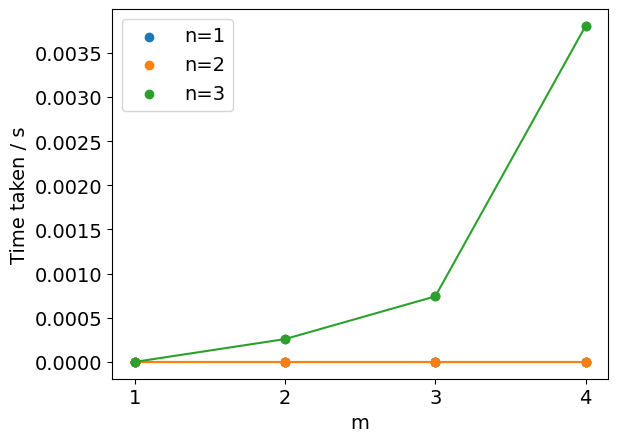

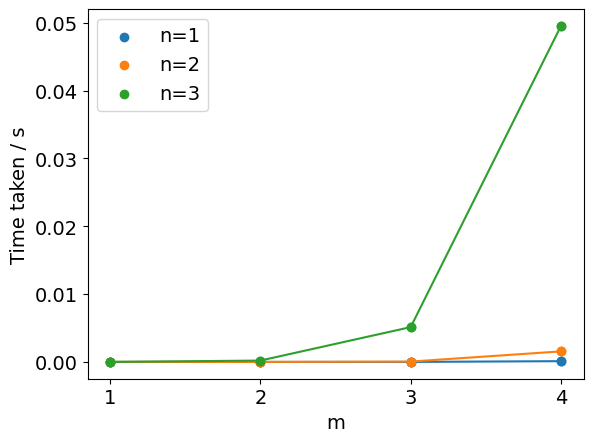

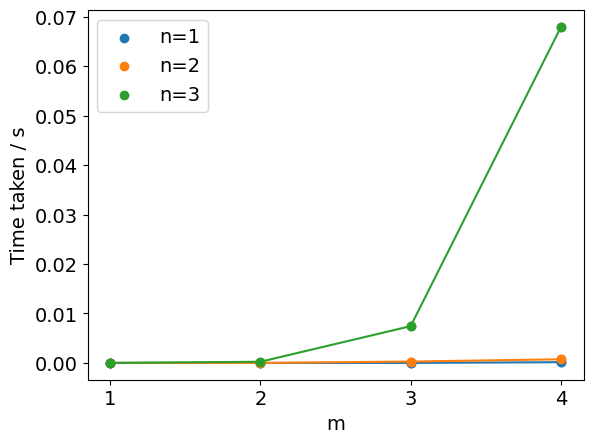

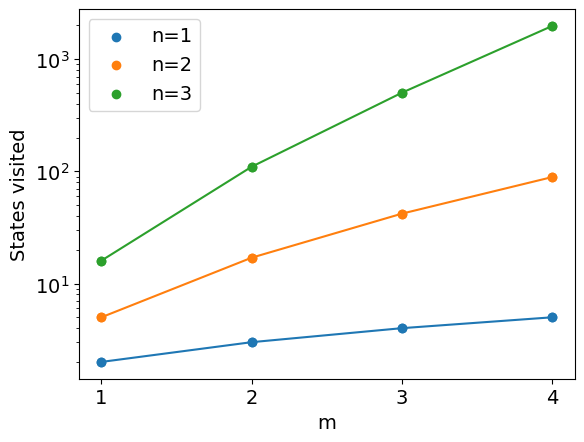

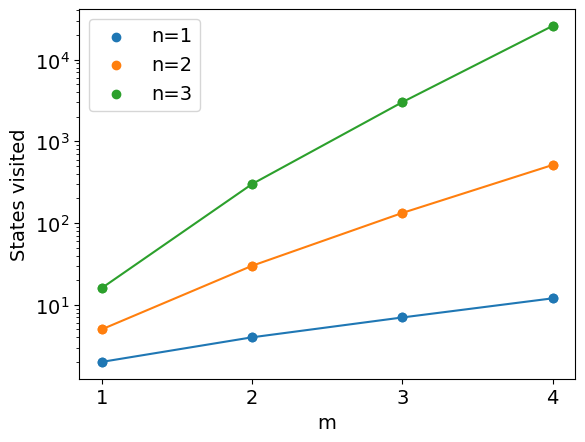

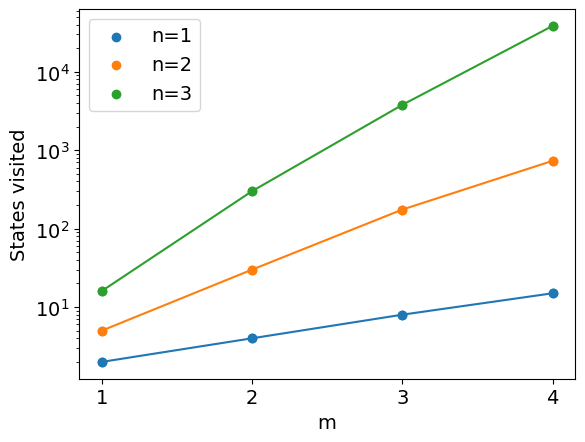

In [101]:
import math

# Assuming your data is stored in a variable named 'data'
# data = ...

# Get the dimensions of the array
_, k, n, m = mean_record.shape

# Split the array into two parts
times = mean_record[0,:,:,:]
states = mean_record[1,:,:,:]

#test = []
#log_array = np.log(times)
for kt in range(k):
    for i in range(n):
        plt.scatter(range(1, m+1), times[kt, i, :], label=f'n={i+1}')
        plt.plot(range(1, m+1), times[kt, i, :], marker='o')
    plt.xticks(np.arange(1, m+1, 1), fontsize=14)  # Set x-axis ticks every 1 unit
    plt.yticks(fontsize=14)
    #plt.title(f'k = {kt+1}')
    plt.xlabel('m', fontsize=14)
    plt.ylabel('Time taken / s', fontsize=14)
    plt.legend(fontsize=14)
    plt.show()
test = []
log_array = np.log(states)
for num in range(1, m+1):
    test.append(math.log(num))
for ks in range(k):
    for i in range(n):
        plt.scatter(range(1, m+1), states[ks, i, :], label=f'n={i+1}')
        plt.plot(range(1, m+1), states[ks, i, :], marker='o')
        #plt.scatter(test, log_array[ks, i, :], label=f'n={i+1}')
        #plt.plot(test, log_array[ks, i, :], marker='o')
    plt.xticks(np.arange(1, m+1, 1), fontsize=14)  # Set x-axis ticks every 1 unit
    plt.yticks(fontsize=14)
    plt.yscale('log')
    #plt.title(f'k = {ks+1}')
    plt.xlabel('m', fontsize=14)
    plt.ylabel('States visited', fontsize=14)
    plt.legend(fontsize=14)
    plt.show()